## Intervalos de confiança

### Importações

In [1]:
# Bibliotecas
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

### Base de dados

In [2]:
# Dados
dados = np.array(
    [
        126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
        140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
        147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
        150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
        154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
        157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
        161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
        164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
        168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
        171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
        178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189.,
        192.5
    ]
)

In [3]:
# Tamanho dos dados
n = len(dados)
n

100

In [4]:
# A media
media = np.mean(dados)
media

159.25

In [5]:
# Desvio_padrão
dp = np.std(dados)
dp

13.65

### Cálculo do intervalo de confiança - manual

In [6]:
# Criando o valor de alpha
alpha = 0.05 / 2
alpha

0.025

In [7]:
# Valor na tabela z
tz = 1 - alpha
tz

0.975

In [8]:
# Criando a variável z com o valor da tabela z
z = norm.ppf(tz)
z

1.959963984540054

In [9]:
# Criando o limnite inferior 
x_inferior = media - z * (dp / math.sqrt(n))
x_inferior

156.57464916110283

In [10]:
# Criando o limnite superior 
x_superior = media + z * (dp / math.sqrt(n))
x_superior

161.92535083889717

In [11]:
# Criando a marge de erro
margem_erro = abs(media - x_superior)
margem_erro

2.675350838897174

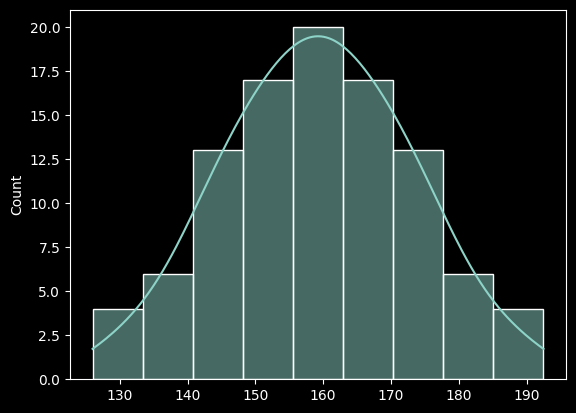

In [12]:
# Visualizando a distribuição
sns.histplot(dados, kde=True);

### Cálculo do intervalo de confiança - scipy
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [13]:
# valor do erro
v_erro = stats.sem(dados)
v_erro

1.3718766178288244

In [14]:
# valor do erro manual
dp / math.sqrt(n - 1)

1.3718766178288246

In [15]:
# Intervalos
intervalos = norm.interval(0.95, media, v_erro)
intervalos

(156.5611712378229, 161.9388287621771)

In [16]:
# Margem de erro
magem_erro = media - intervalos[0]
magem_erro

2.68882876217711

### Diferentes níveis de confiança

In [17]:
# intervalos de 99
intervalos = norm.interval(0.99, media, v_erro)
intervalos

(155.71628000694295, 162.78371999305705)

In [18]:
# A margem de erro de 99
margem_erro = media - intervalos[0]
margem_erro

3.5337199930570478

In [19]:
# intervalos 80
intervalos = norm.interval(0.8, media, stats.sem(dados))
intervalos

(157.49186937268743, 161.00813062731257)

In [20]:
# margem de erro de 80
margem_erro = media - intervalos[0]
margem_erro

1.7581306273125676

### Distribuição T Student

In [21]:
# base de dados
dados = np.array(
    [
        149. , 160., 147., 189., 175., 168., 156., 160., 152.
    ]
)

In [22]:
# tamanho 
n = len(dados)
n

9

In [23]:
# media
media = dados.mean()
media

161.77777777777777

In [24]:
# Desvio padrão
dp = np.std(dados)
dp

12.786953227391823

In [25]:
# Biblioteca
from scipy.stats import t

In [26]:
# intervalo de confiança
intervalos = t.interval(0.95, n - 1, media, stats.sem(dados, ddof=0))
intervalos

(151.9488554388298, 171.60670011672573)

In [27]:
# margem de erro
magem_erro = media - intervalos[0]
magem_erro

9.828922338947962

## Intervalos de confiança e classificação em ML

### Accuracy

In [28]:
# Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [29]:
# Base de dados
df = pd.read_csv('../Labs/Amostragem/credit_data.csv')
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


### Divisão entre treino e teste

In [30]:
# variável de previsão e classe
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

### Modelo de ML

In [31]:
# treinamento do modelo
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []
for i in range(50):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv = kfold)
    resultados_naive_bayes_cv_300.append(scores)
    resultados_naive_bayes_cv.append(scores.mean())

    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv = kfold)
    resultados_logistica_cv_300.append(scores)
    resultados_logistica_cv.append(scores.mean())
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_cv_300.append(scores)
    resultados_forest_cv.append(scores.mean())

### Tamanhos

In [32]:
# tamanho da lista
len(resultados_naive_bayes_cv), len(resultados_naive_bayes_cv_300)

(50, 50)

In [33]:
# Tamanho do array
np.asarray(resultados_naive_bayes_cv_300).shape

(50, 10)

### Trasformando os dados

In [34]:
# redimensionando os dados
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

In [35]:
# Tamanho
resultados_naive_bayes_cv_300.shape

(500,)

### Gráficos

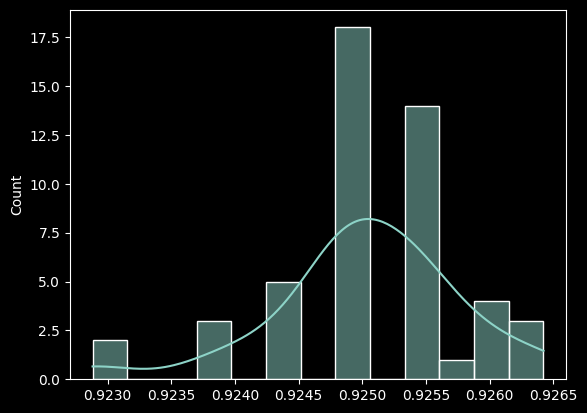

In [36]:
# Gráfios
sns.histplot(resultados_naive_bayes_cv, kde=True);

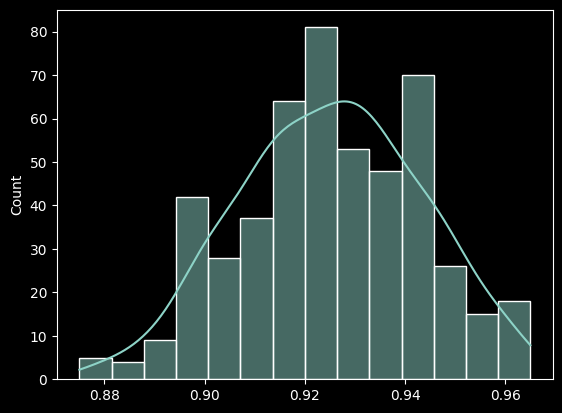

In [37]:
# Gráfios
sns.histplot(resultados_naive_bayes_cv_300, kde=True);

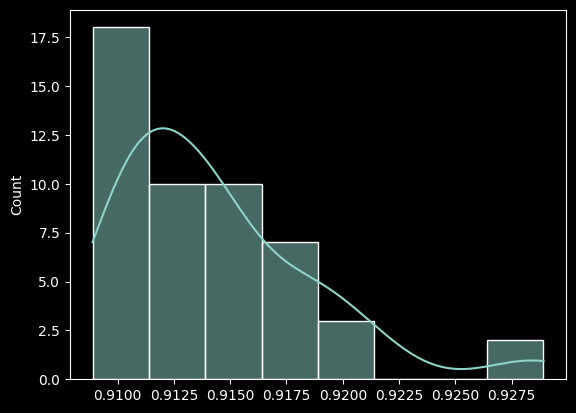

In [38]:
# Gráfios
sns.histplot(resultados_logistica_cv, kde=True);

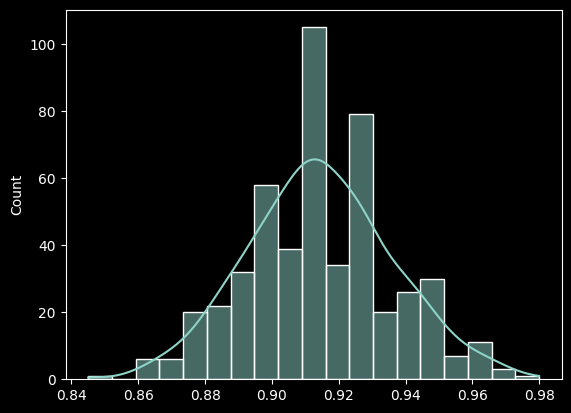

In [39]:
# Gráfios
sns.histplot(resultados_logistica_cv_300, kde=True);

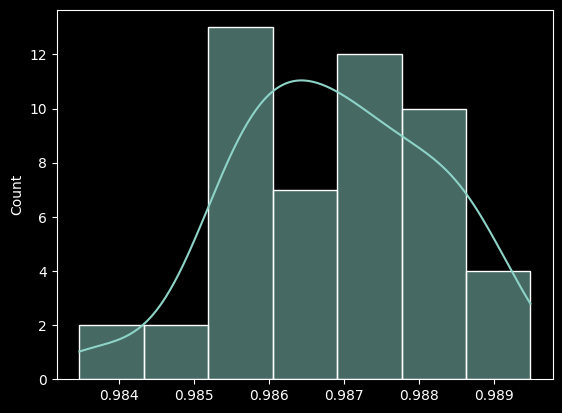

In [40]:
# Gráfios
sns.histplot(resultados_forest_cv, kde=True);

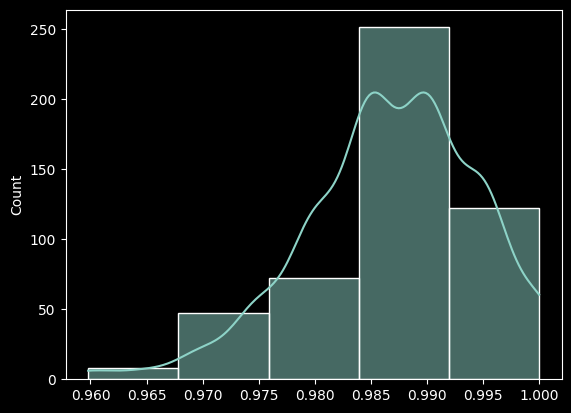

In [41]:
# Gráfios
sns.histplot(resultados_forest_cv_300, bins=5, kde=True);

### Média e Coeficiente de Variação

In [42]:
# Média
resultados_naive_bayes_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9250272361809045, 0.9143703015075377, 0.986871055276382)

In [43]:
# Variação 
stats.variation(resultados_naive_bayes_cv) * 100, stats.variation(resultados_logistica_cv) * 100, stats.variation(resultados_forest_cv) * 100

(0.0788960077947483, 0.4784418020769104, 0.1346816556368485)

### Intervalos de Confiança

In [44]:
# Bibliotecas
from scipy.stats import t
from scipy.stats import norm

#### Naïve bayes

In [45]:
# Intervalo de confiança 
intervalos_naive_bayes_t = t.interval(
    0.95, len(resultados_naive_bayes_cv) - 1, 
    resultados_naive_bayes_cv.mean(), 
    stats.sem(resultados_naive_bayes_cv, ddof = 0)
)
intervalos_naive_bayes_t

(0.9248198265990117, 0.9252346457627973)

In [46]:
# Margem de erro
abs(resultados_naive_bayes_cv.mean() - intervalos_naive_bayes_t[1])

0.00020740958189280345

In [47]:
# Intervalo de confiança 
intervalos_naive_bayes_n = norm.interval(
    0.95, resultados_naive_bayes_cv_300.mean(), 
    stats.sem(resultados_naive_bayes_cv_300)
)
intervalos_naive_bayes_n

(0.9234303298740386, 0.9266241424877705)

In [48]:
# Margem de erro
abs(resultados_naive_bayes_cv_300.mean() - intervalos_naive_bayes_n[1])

0.0015969063068659306

#### Regressão logística

In [49]:
# Intervalo de confiança
intervalos_logistica_t = t.interval(
    0.95, len(resultados_logistica_cv) - 1, 
    resultados_logistica_cv.mean(), 
    stats.sem(resultados_logistica_cv, ddof = 0)
)
intervalos_logistica_t

(0.9131270170710922, 0.9156135859439832)

In [50]:
# Margem de erro
abs(resultados_logistica_cv.mean() - intervalos_logistica_t[1])

0.001243284436445502

In [51]:
# Intervalo de confiança
intervalos_logistica_n = norm.interval(
    0.95, resultados_logistica_cv_300.mean(), 
    stats.sem(resultados_logistica_cv_300)
)
intervalos_logistica_n

(0.9124558688373753, 0.9162847341777)

In [52]:
# Margem de erro
abs(resultados_logistica_cv_300.mean() - intervalos_logistica_n[1])

0.001914432670162336

#### Random Forest

In [53]:
# Intervalo de confiança
intervalos_forest_t = t.interval(
    0.95, len(resultados_forest_cv) - 1, 
    resultados_forest_cv.mean(), 
    stats.sem(resultados_forest_cv, ddof = 0)
)
intervalos_forest_t

(0.9864933194950372, 0.9872487910577268)

In [54]:
# Margem de erro
abs(resultados_forest_cv.mean() - intervalos_forest_t[1])

0.00037773578134481234

In [55]:
# Intervalo de confiança
intervalos_forest_n = norm.interval(
    0.95, resultados_forest_cv_300.mean(), 
    stats.sem(resultados_forest_cv_300)
)
intervalos_forest_n

(0.9861890373590878, 0.9875530731936761)

In [56]:
# Margem de erro
abs(resultados_forest_cv_300.mean() - intervalos_forest_n[1])

0.0006820179172941643

Temos 95% de confiança de que a média de acertos do Random Forest está  
no intervalo entre 98,63% e 98,74% - 98,59% e 98,77%